In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

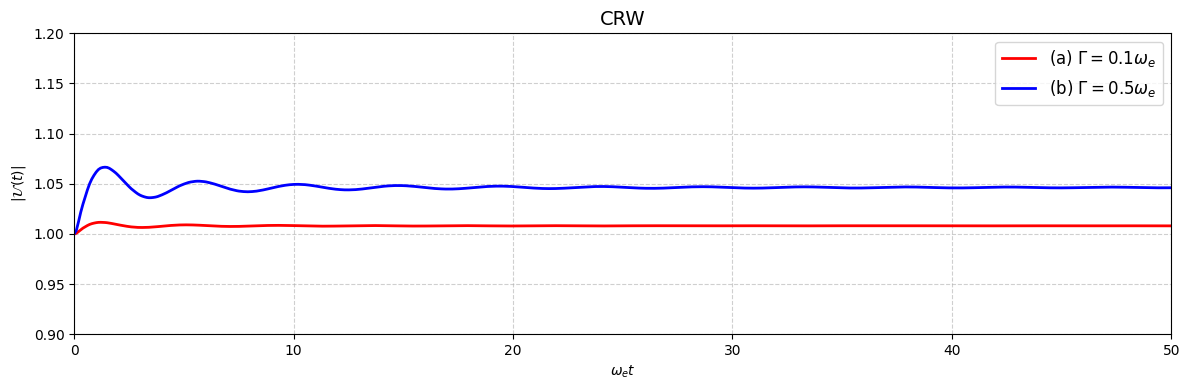

In [6]:
#def the parameters 
omega_e = 1.0          
Delta = 0.5 * omega_e  
Gamma_list = [0.1 * omega_e, 0.5 * omega_e]
labels = [r'(a) $\Gamma=0.1\omega_e$', r'(b) $\Gamma=0.5\omega_e$']
colors = ['red', 'blue']
def spectral_density(omega, Gamma, w_e):
    if omega <= w_e:
        return 0.0
    return (Gamma / np.pi) * np.sqrt(omega - w_e) / omega
N_modes = 2000    #hierbet space      
w_cutoff = 15 * omega_e #the larggest W
omega_k = np.linspace(omega_e + 1e-4, w_cutoff, N_modes)
d_omega = omega_k[1] - omega_k[0] 
def system_dynamics(t, y, g_k_list, omega_k_list, Delta):
    u = y[0]
    v = y[1:]
    du_dt = -1j * Delta * u + np.sum(g_k_list * v)
    dv_dt = 1j * omega_k_list * v + g_k_list * u
    return np.concatenate(([du_dt], dv_dt))
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 500)
plt.figure(figsize=(12, 4))
for i, Gamma in enumerate(Gamma_list):
    J_vals = np.array([spectral_density(w, Gamma, omega_e) for w in omega_k])
    g_k = np.sqrt(J_vals * d_omega)
    y0 = np.zeros(N_modes + 1, dtype=complex)
    y0[0] = 1.0 + 0j
    sol = solve_ivp(
        system_dynamics, 
        t_span, 
        y0, 
        t_eval=t_eval, 
        args=(g_k, omega_k, Delta),
        rtol=1e-6, atol=1e-8
    )
    U_t_abs = np.abs(sol.y[0]) 
    plt.plot(sol.t, U_t_abs, 
             color=colors[i], 
             linewidth=2,
             label=labels[i])
    plt.xlabel(r'$\omega_e t$')
    plt.ylabel(r'$|\mathcal{U}(t)|$')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0.9, 1.2)
    plt.xlim(0, 50)
plt.legend(fontsize=12, loc='best')
plt.title(r'CRW', fontsize=14)
plt.tight_layout()
plt.savefig('fig2_exact.png', dpi=300)
plt.show()